## 5.9 Regression 실습 - Bike Sharing Demand
### 데이터 클렌징 및 가공

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv(r'C:\Users\Gram\Desktop\study\파이썬 머신러닝 완벽 가이드\5장 회귀\data\bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp<br>
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울<br>
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날<br>
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일<br>
weather:<br>
• 1 = 맑음, 약간 구름 낀 흐림<br>
• 2 = 안개, 안개 + 흐림<br>
• 3 = 가벼운 눈, 가벼운 비 + 천둥<br>
• 4 = 심한 눈/비, 천둥/번개
temp: 온도(섭씨)<br>
atemp: 체감온도(섭씨)<br>
humidity: 상대습도<br>
windspeed: 풍속<br>
casual: 사전에 등록되지 않는 사용자가 대여한 횟수<br>
registered: 사전에 등록된 사용자가 대여한 횟수<br>
count: 대여 횟수<br>

In [2]:
bike_df.info()

# null은 없음
# datetime은 object인 문자열
# datetime은 년, 월, 일로 이뤄어져 있고 계절에 따라 자전거를 타므로 분리해서 확인해 봐야 함
# 시간대별로 출퇴근 시간에 자전거를 많이 이용할 수도 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### datetime 데이터 타입 변경 

In [3]:
# datatime을 문자열 타입에서 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime) # 'datetime' 칼럼을 datetime 타입으로 변경해줌
bike_df.info()

# datetime칼럼 타입이 object에서 datetime64으로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### 데이터 타입이 변경된 datetime에서 필요한 데이터 추출

In [6]:
# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)   # 년
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month) # 월
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)     # 일
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)    # 시간
print(bike_df.info())
bike_df.head(3)

# year, month, day, hour 데이터가 추가됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


#### 불필요한 데이터 드롭

In [7]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

### 로그 변환, 피처 인코딩, 모델 학습/예측/평가

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [9]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']  # 타겟 데이터
X_features = bike_df.drop(['count'],axis=1,inplace=False)  # 피처 데이터

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)  # 여기서는 학습 데이터만 가지고 분할해 봄

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

# rmsle는 로그 변환으로 인해 많이 줄어든 것도 있지만, rmse에 비해 많이 줄어듬
# 오류가 크게 나온 경우

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


#### 오류값을 확인

In [11]:
def get_top_error_data(y_test, pred, n_tops = 5):
    
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)  # 실제 예측한 predicted_count를 앞에서 예측한 pred값으로 칼럼을 하나 만듬
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])  # 절대값 형태로 만들어 뺌
    
    #예측값과 실제값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=20)

# ral_count가 큰 값들을 보면 diff가 잘못나오고 있음을 알 수 있음

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0
2277         813            267.0  546.0
2314         766            222.0  544.0
454          721            177.0  544.0
1003         713            171.0  542.0
2394         684            142.0  542.0
1181         891            357.0  534.0
1379         745            212.0  533.0
2003         770            241.0  529.0
1029         901            378.0  523.0
3227         724            202.0  522.0
1038         873            353.0  520.0
3197         694            176.0  518.0
507          688            174.0  514.0
637          900            393.0  507.0
87           594             95.0  499.0


#### 타겟값이 정규분포인지 확인

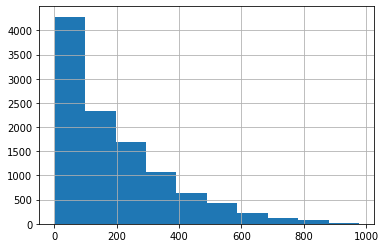

In [12]:
y_target.hist()

# 정규분포 형태를 이루지 않고, 치우쳐저 있음

#### 변환

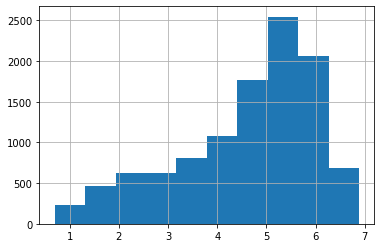

In [13]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

# 변환했지만 정규분포 형태는 아니고 그나마 나아짐

#### 변환한 값으로 데이터 할당

In [14]:
# 변환한 값을 y_target_log 변수에 할당
y_target_log = np.log1p(y_target) 

# 타겟값을 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)  # 원래 값으로 스케일링

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)  # 원래 값으로 

evaluate_regr(y_test_exp ,pred_exp)  # 이 함수에는 변환된 타겟값을 넣지 않음 -> 함수 안에서 이미 로그 변환을 했기 때문

# rmsle는 10%정도 줄어듬, rmse는 더 높아짐 -> count 큰값들이 더 벌어진 것

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


#### 회귀계수를 각 피처별로 시각화

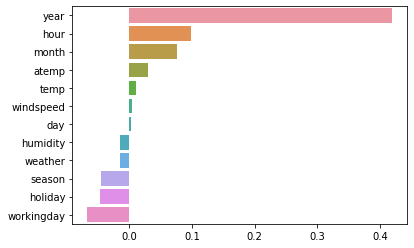

In [15]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# month나 hour는 자전거가 계절을 타므로 납득이 되지만 year가 큰 것은 이상함
# weather, season도 생각보다 낮음

#### 원 핫 인코딩 실시

In [16]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday', 'workingday','season','weather'])

#### 원 핫 인코딩한 데이터로 다시 데이터 생성하고 분리

In [17]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


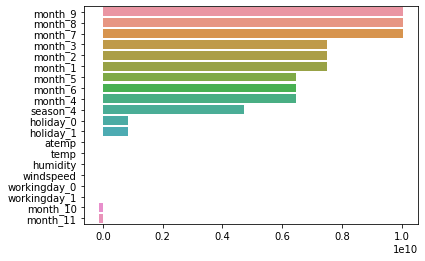

In [18]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

# 상식적인 수준으로 나타나기 시작함

#### 하이퍼 파라미터 기본값으로 회귀트리 수행

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

선형회귀와 회귀트리 이용한 실습<br>
정규분포 형태를 이루는 것이 중요<br>
코드값에 대한 원핫인코딩도 중요